# Dataset source: 
https://nijianmo.github.io/amazon/index.html

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_json("Movies_and_TV_5.json.gz", compression='gzip', lines=True)

In [136]:
df10 = df 
# Save original backup copy to df1

In [137]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410019 entries, 0 to 3410018
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 289.4+ MB


In [139]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

# Data Cleaning

In [140]:
df.isnull().sum()
# will be dropping null for column 'styles' ~5% of data

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              174207
reviewerName           82
reviewText           1581
summary               640
unixReviewTime          0
vote              2768010
image             3403048
dtype: int64

In [141]:
df['style'].value_counts() 

{'Format:': ' DVD'}                                1645586
{'Format:': ' Amazon Video'}                       1027966
{'Format:': ' Blu-ray'}                             335181
{'Format:': ' Prime Video'}                         158950
{'Format:': ' VHS Tape'}                             61821
{'Format:': ' HD DVD'}                                1475
{'Format:': ' DVD-R'}                                 1428
{'Format:': ' Theatrical Release'}                     801
{'Format:': ' Audio CD'}                               657
{'Format:': ' DVD-ROM'}                                474
{'Format:': ' UMD for PSP'}                            352
{'Format:': ' Amazon Instant Video'}                   250
{'Format:': ' Electronics'}                            116
{'Format:': ' Hardcover'}                              107
{'Format:': ' Interactive DVD'}                         97
{'Format:': ' Paperback'}                               86
{'Format:': ' Laser Disc'}                              

In [142]:
df['reviewText']

0          So sorry I didn't purchase this years ago when...
1          Believe me when I tell you that you will recei...
2          I have seen X live many times, both in the ear...
3          I was so excited for this!  Finally, a live co...
4          X is one of the best punk bands ever. I don't ...
                                 ...                        
3410014    The singing parts are very good as expected fr...
3410015    This recording of the 2015 production by the M...
3410016    I do not wish to write a review about this rel...
3410017                                       It was a gift.
3410018    This Otello originates from the Salzburg Festi...
Name: reviewText, Length: 3410019, dtype: object

In [143]:
df['reviewText'][0]

"So sorry I didn't purchase this years ago when it first came out!!  This is very good and entertaining!  We absolutely loved it and anticipate seeing it repeatedly.  We actually wore out the cassette years back, so we also purchased this same product on cd.  Best purchase we made out of all!  Would purchase on dvd if we could find one."

In [144]:
# drop null values from these columns
df = df.dropna(subset=['style','reviewerName', 'reviewText', 'summary'])

In [145]:
# drop these columns
df.drop(['vote','image','unixReviewTime'],axis=1,inplace=True)

C:\Users\eugen\AppData\Local\Temp\ipykernel_360\2848868238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['vote','image','unixReviewTime'],axis=1,inplace=True)


In [146]:
df.isnull().sum()

overall         0
verified        0
reviewTime      0
reviewerID      0
asin            0
style           0
reviewerName    0
reviewText      0
summary         0
dtype: int64

In [147]:
duplicated_reviews = df[df.duplicated(['reviewText'], keep=False)]

In [148]:
duplicated_reviews.info()
# we have about 860k duplicates of text review
# lets remove them, which is about 25% of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868955 entries, 29 to 3410018
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   overall       868955 non-null  int64 
 1   verified      868955 non-null  bool  
 2   reviewTime    868955 non-null  object
 3   reviewerID    868955 non-null  object
 4   asin          868955 non-null  object
 5   style         868955 non-null  object
 6   reviewerName  868955 non-null  object
 7   reviewText    868955 non-null  object
 8   summary       868955 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 60.5+ MB


In [149]:
df = df.drop_duplicates(subset=['reviewText'])

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2560768 entries, 0 to 3410016
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   overall       int64 
 1   verified      bool  
 2   reviewTime    object
 3   reviewerID    object
 4   asin          object
 5   style         object
 6   reviewerName  object
 7   reviewText    object
 8   summary       object
dtypes: bool(1), int64(1), object(7)
memory usage: 178.3+ MB


In [151]:
type(df['reviewTime'][0]) # time in str format, lets change it to datetime object

str

In [152]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

In [153]:
type(df['reviewTime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [154]:
df['reviewTime'].describe()

C:\Users\eugen\AppData\Local\Temp\ipykernel_360\3300267488.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['reviewTime'].describe()


count                 2560768
unique                   7285
top       2015-02-20 00:00:00
freq                     6021
first     1997-12-02 00:00:00
last      2018-10-01 00:00:00
Name: reviewTime, dtype: object

In [155]:
df = df.reset_index(drop=True)

In [156]:
df = df.rename(columns={'overall':'rating','asin':'productID','style':'productType'})

In [157]:
# Clone to another df called df1, will be setting index to date for this df1

In [158]:
df1 = df

In [159]:
df1 = df1.set_index('reviewTime')

In [160]:
df1 = df1.sort_index()

In [161]:
df1

,rating,verified,reviewerID,productID,productType,reviewerName,reviewText,summary
reviewTime,,,,,,,,
1997-12-02,5,False,A28BJ12568I17K,6304123523,{'Format:': ' VHS Tape'},Mire Uno,This TV animation series opened up many disput...,"It arose ""Evangelion Phenomina"" in Japan"
1998-01-03,4,False,A30Q8X8B1S3GGT,6300215695,{'Format:': ' VHS Tape'},Mark Savary,"Here's a semi-remake of ""Holiday Inn"" (1942), ...",Holiday favorite with Bing Crosby and Danny Kaye!
1998-01-03,4,True,A3TQZ521KSRUZ1,B0001NBMEY,{'Format:': ' VHS Tape'},Anthony Scheinman,This verison (which was first made as a theatr...,A version that will keep viewers riveted!
1998-02-05,5,False,A28BJ12568I17K,6303118240,{'Format:': ' VHS Tape'},Mire Uno,Animation by Hayao Miyazaki and one of my favo...,Nostalgy for Japan in 50s
1998-02-24,5,False,A28BJ12568I17K,6304164084,{'Format:': ' VHS Tape'},Mire Uno,Japanese title is Macross and quite long TV an...,Macross: well loved saga in Japan
...,...,...,...,...,...,...,...,...
2018-09-28,4,True,A2TRYG5M981MG8,B01FRCEVDM,{'Format:': ' DVD'},Robert E,I enjoyed it but can't say more so as not to s...,Interesting Movie
2018-09-29,5,True,A1Y5BG2UI932NA,B01HEXXM9G,{'Format:': ' Blu-ray'},Crazzie1,"I must say, this one is a really good one. I'd...",Dont pass it up.
2018-09-29,4,True,A26NCB8P62PZAW,B01GF9N7FE,{'Format:': ' DVD'},S. Karl,Was there a chance that this movie would ever ...,Not for the Oscar crowd.


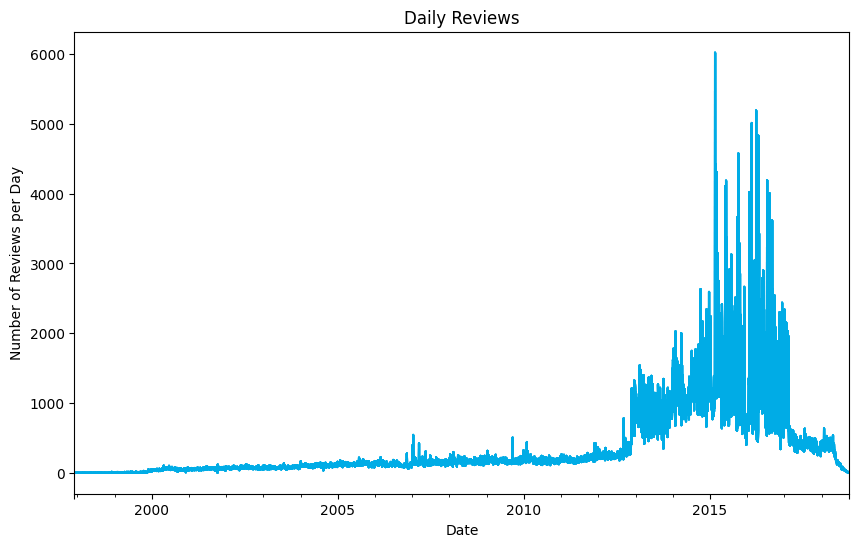

In [162]:
df_count = df1.resample('D').count()

# Create a line plot of the number of data points across the datetime index
df_count.plot(kind='line', figsize=(10, 6), legend=None, color='#00ace6')
plt.xlabel('Date')
plt.ylabel('Number of Reviews per Day')
plt.title('Daily Reviews')
plt.show()

In [163]:
# df1['year'] = df1['reviewTime'].dt.year()

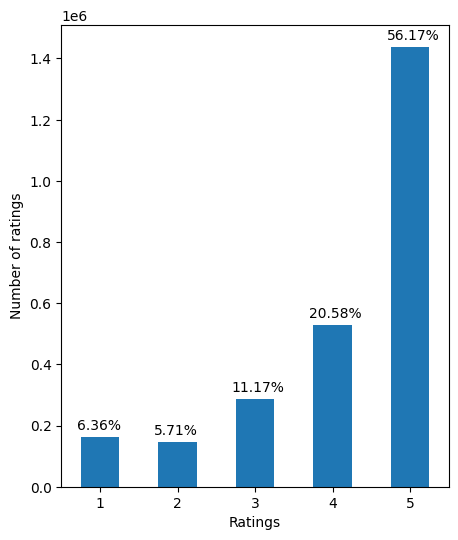

In [164]:
plt.figure(figsize=(5,6))
rating = df1['rating'].value_counts().sort_index(ascending=False)[::-1]
total_count = len(df1)
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    percent = round((v/total_count)*100, 2)
    ax.text(i-0.3, v+25000, str(percent) + '%')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.xticks(rotation=0)  
plt.show()

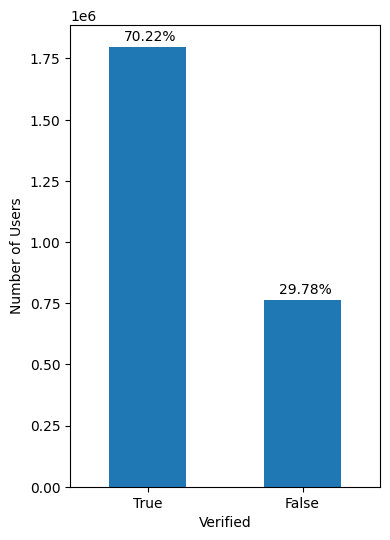

In [165]:
plt.figure(figsize=(4,6))
rating = df1['verified'].value_counts()
total_count = len(df1)
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    percent = round((v/total_count)*100, 2)
    ax.text(i-0.15, v+25000, str(percent) + '%')
plt.xlabel('Verified')
plt.xticks(rotation=0)
plt.ylabel('Number of Users')
plt.show()

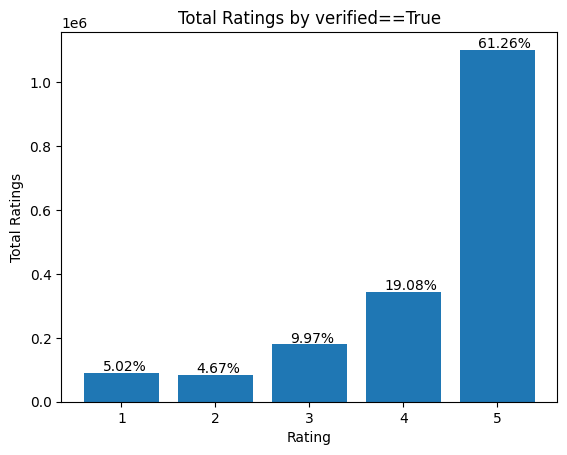

In [166]:
# Subset the dataframe to only include rows where gender is male
df_true = df1[df1['verified'] == True]

# Group by rating and calculate the sum of total_ratings for each rating
true_ratings = df_true.groupby('rating')['verified'].sum()

# Create a barplot of the male ratings
plt.bar(true_ratings.index, true_ratings.values)
plt.xlabel('Rating')
plt.ylabel('Total Ratings')
plt.title('Total Ratings by verified==True')

# Add percentage values to each bar
total = sum(true_ratings)
for i, v in enumerate(true_ratings):
    percent = round((v/total)*100, 2)
    plt.text(i+0.8, v+6000, str(percent)+'%')
    
plt.show()

In [ ]:
df_false = df1[df1['verified'] == False]

In [176]:
df_false.head(2)

,rating,verified,reviewerID,productID,productType,reviewerName,reviewText,summary
reviewTime,,,,,,,,
1997-12-02,5,False,A28BJ12568I17K,6304123523,{'Format:': ' VHS Tape'},Mire Uno,This TV animation series opened up many disput...,"It arose ""Evangelion Phenomina"" in Japan"
1998-01-03,4,False,A30Q8X8B1S3GGT,6300215695,{'Format:': ' VHS Tape'},Mark Savary,"Here's a semi-remake of ""Holiday Inn"" (1942), ...",Holiday favorite with Bing Crosby and Danny Kaye!


In [174]:
df_false['rating'].value_counts()

5    336821
4    183953
3    106874
1     72681
2     62369
Name: rating, dtype: int64

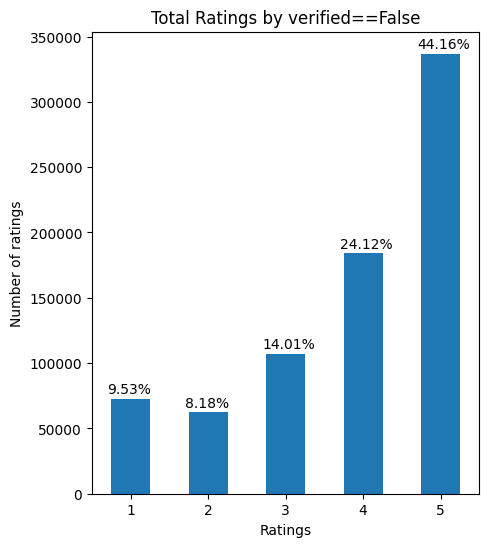

In [182]:
plt.figure(figsize=(5,6))
rating = df_false['rating'].value_counts().sort_index(ascending=False)[::-1]
total_count = len(df_false)
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    percent = round((v/total_count)*100, 2)
    ax.text(i-0.3, v+4000, str(percent) + '%')
plt.title('Total Ratings by verified==False')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.xticks(rotation=0)  
plt.show()